In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.titlesize'] = 36

For figure 3, cylinders with wavenumber 0.9 were simulated on a range of shapes $a$ with the finer spacing of $0.05$

In [229]:
dir= "~/arc3-d/"
paths = dict([(a,os.path.join(dir, "k9a"+str(a).rjust(2,'0')+"_finer")) for a in range(0,100,5)])
print(paths)

{0: '~/arc3-d/k9a00_finer', 5: '~/arc3-d/k9a05_finer', 10: '~/arc3-d/k9a10_finer', 15: '~/arc3-d/k9a15_finer', 20: '~/arc3-d/k9a20_finer', 25: '~/arc3-d/k9a25_finer', 30: '~/arc3-d/k9a30_finer', 35: '~/arc3-d/k9a35_finer', 40: '~/arc3-d/k9a40_finer', 45: '~/arc3-d/k9a45_finer', 50: '~/arc3-d/k9a50_finer', 55: '~/arc3-d/k9a55_finer', 60: '~/arc3-d/k9a60_finer', 65: '~/arc3-d/k9a65_finer', 70: '~/arc3-d/k9a70_finer', 75: '~/arc3-d/k9a75_finer', 80: '~/arc3-d/k9a80_finer', 85: '~/arc3-d/k9a85_finer', 90: '~/arc3-d/k9a90_finer', 95: '~/arc3-d/k9a95_finer'}


In [230]:
alphas =[x for x in range(-5,0)]
cs =[x for x in np.arange(.5,4,1)]
k=.9
n=6

In [231]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data


In [232]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))
    
def complex_heatmap_2(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    return data.transpose()

Read in field energies and check a file.

<AxesSubplot:>

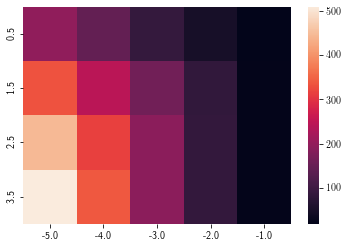

In [237]:
field_energies = dict([(a,sort_csv(os.path.join(paths[a], "field_energy.csv"), dtype=complex)) for a in paths])
sb.heatmap(field_energies[70])

Read in global quilibration cutoffs and check a case.  Should all be well below 50 000.

<AxesSubplot:>

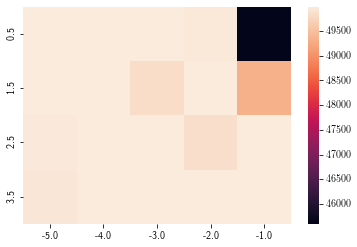

In [239]:
cutoffs = dict([(a,sort_csv(os.path.join(paths[a], "global_cutoff.csv"), dtype=complex)) for a in paths])
sb.heatmap(cutoffs[20])

Check the maximum (least equilibrated simulation)

In [240]:
max_cutoffs= dict([(a,max([max(cutoffs[a].loc[h]) for h in cutoffs[a].index])) for a in paths])
max_cutoffs

{0: 1360.0,
 5: 8438.0,
 10: 5017.0,
 15: 2261.0,
 20: 49994.0,
 25: 41146.0,
 30: 20925.0,
 35: 27087.0,
 40: 26274.0,
 45: 29581.0,
 50: 31442.0,
 55: 15385.0,
 60: 21547.0,
 65: 22687.0,
 70: 38255.0,
 75: 31754.0,
 80: 38687.0,
 85: 22424.0,
 90: 43885.0,
 95: 14373.0}

Most problematic in the case of .9, .8, .7 - in each case in a a=-5 case.

Get the avg of cutoff points

In [241]:
mean_cutoffs= dict([(a,sum([sum(cutoffs[a].loc[h])/len(cutoffs[a].loc[h]) for h in cutoffs[a].index])/len(cutoffs[a].index)) for a in paths])
print(mean_cutoffs)
print(sum(mean_cutoffs.values())/ len(mean_cutoffs))

{0: 175.35000000000002, 5: 688.75, 10: 805.9000000000001, 15: 402.05, 20: 49718.3, 25: 9193.05, 30: 6878.1, 35: 7261.449999999999, 40: 7463.25, 45: 7333.35, 50: 6389.799999999999, 55: 3938.35, 60: 5414.7, 65: 6840.85, 70: 8151.3, 75: 6636.85, 80: 7229.150000000001, 85: 5264.4, 90: 7597.85, 95: 6284.5}
7683.3650000000025


Equilibrated on average after 5471 steps, with a maximum of 43885.

<AxesSubplot:>

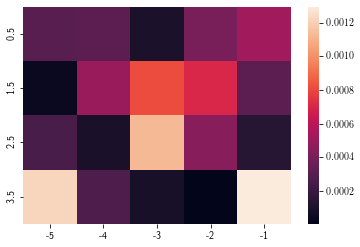

In [242]:
minimum_as = dict([])
minimum_Es = dict([])
for alpha in alphas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for c in cs:
        energies = [(field_energies[a].loc[c, alpha],a) for a in paths]
        energy, a = min(energies)
        minimum_as_row[c]= a
        minimum_Es_row[c] = energy
    minimum_as[alpha]=minimum_as_row
    minimum_Es[alpha] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_Es)

Let's look at those timeseries

In [246]:
time_series_files =dict([(a, os.path.join(paths[a], "alpha_-3.0_C_1.5.csv")) for a in paths])
time_df = dict([(a,pd.read_csv(time_series_files[a])) for a in paths])
time_df[20]

,Unnamed: 0,abs_amplitude,amplitude_squared,field_energy,surface_energy,param_0,real_group_sampling_width
0,0,0.201083,0.040435,214.422092,437.745784,0.201083,0.005083
1,1,0.203511,0.041417,214.391684,437.722403,0.203511,0.005168
2,2,0.203511,0.041417,214.369321,437.722403,0.203511,0.005131
3,3,0.203637,0.041468,214.313501,437.721181,0.203637,0.005217
4,4,0.203637,0.041468,214.262509,437.721181,0.203637,0.005179
...,...,...,...,...,...,...,...
49995,49995,0.989997,0.980095,184.733412,403.260766,0.989997,0.000059
49996,49996,0.989993,0.980086,184.737561,403.261107,0.989993,0.000059
49997,49997,0.989993,0.980086,184.731271,403.261107,0.989993,0.000059
49998,49998,0.989995,0.980089,184.736777,403.260987,0.989995,0.000059


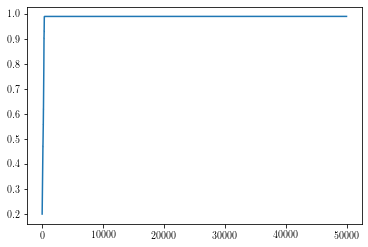

In [253]:
a=20
plt.plot([complex(x).real for x in time_df[a].loc[:,'abs_amplitude']])

This is the 3 most problematic ones

(502.5, 504.5)

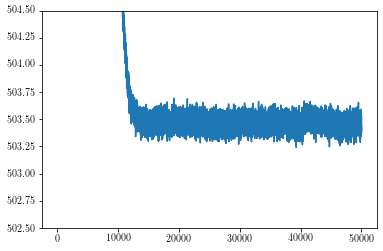

In [222]:
a=90
time_series_files =dict([(a, os.path.join(paths[a], "alpha_-5.0_C_3.5.csv")) for a in paths])
time_df = dict([(a,pd.read_csv(time_series_files[a])) for a in paths])
plt.plot([complex(x).real for x in time_df[a].loc[:,'field_energy']])
plt.ylim(502.5,504.5)

(465.0, 467.0)

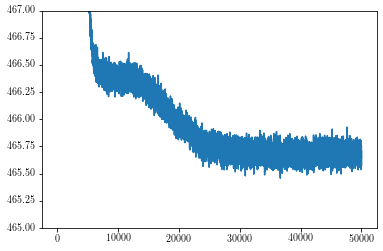

In [206]:
a=80
time_series_files =dict([(a, os.path.join(paths[a], "alpha_-5.0_C_2.5.csv")) for a in paths])
time_df = dict([(a,pd.read_csv(time_series_files[a])) for a in paths])
plt.plot([complex(x).real for x in time_df[a].loc[:,'field_energy']])
plt.ylim(465,467)

(194.0, 196.0)

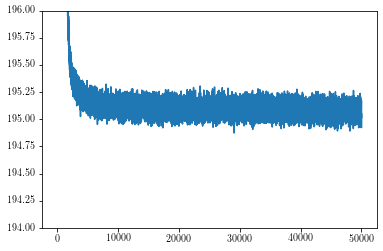

In [214]:
a=70
time_series_files =dict([(a, os.path.join(paths[a], "alpha_-5.0_C_0.5.csv")) for a in paths])
time_df = dict([(a,pd.read_csv(time_series_files[a])) for a in paths])
plt.plot([complex(x).real for x in time_df[a].loc[:,'field_energy']])
plt.ylim(194,196)

They look ok after detected equilibration point, and in each case final field energy does not stand out from the pattern of its neighbors

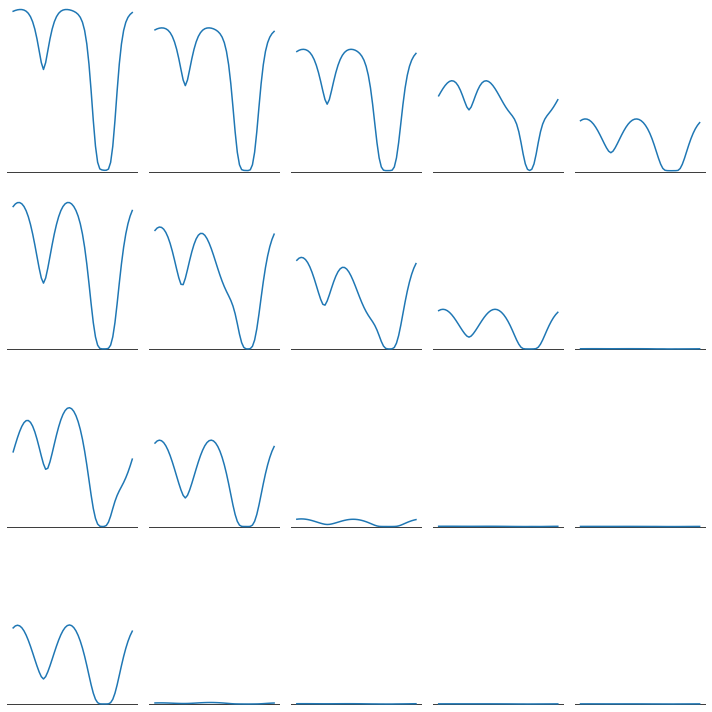

In [91]:
nrows, ncols = field_energies[80].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=80

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas ]):
    alpha,c= params
    #print(params)
    filename="alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_profile_abs.csv"
    #print(filename)
    profile= pd.read_csv(os.path.join(paths[a], filename), index_col=0)
    ax.set_ylim((0,math.sqrt(5)))
    ax.axis('off')
    ax.axhline(y=0, color='black')
    ax.plot(profile)
    #plt.show()

plt.tight_layout()
#pp.savefig()
plt.show()
#pp.close()

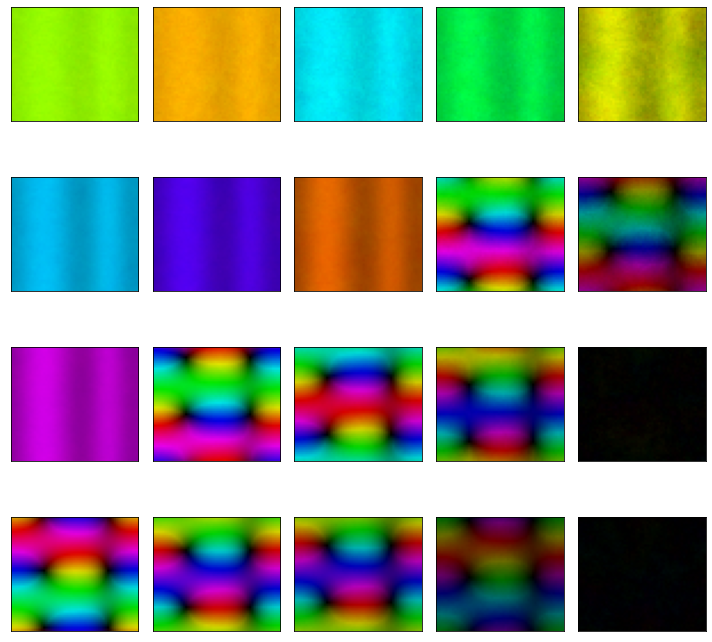

In [160]:
nrows, ncols = field_energies[80].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))
a=25
for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas ]):
    alpha,c= params
    #print(params)
    filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
    #print(filename)
    heatmap= complex_heatmap_2(filename)
    ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=math.sqrt(abs(alpha))))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
plt.show()
#pp.close()

In [100]:
surfdatatens=pd.read_csv("chapter2data/surfenergytens.csv", index_col=0)
surfdatatens

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2
0.0,31.415927,20.943951,15.707963,12.566371,10.471976,8.975979,7.853982,6.981317,6.283185,5.711987,5.235988
0.1,31.340798,20.896463,15.675075,12.542864,10.455242,8.964527,7.846878,6.977940,6.283098,5.714871,5.241606
0.2,31.118597,20.755887,15.577570,12.473002,10.405300,8.930086,7.825168,6.967105,6.281832,5.722216,5.256835
0.3,30.758515,20.527687,15.418832,12.358730,10.322969,8.872507,7.787817,6.946938,6.276688,5.730493,5.277303
0.4,30.274725,20.220337,15.204171,12.203193,10.209704,8.791816,7.733573,6.914987,6.264059,5.734965,5.297151
0.5,29.684931,19.844510,14.940386,12.010563,10.067667,8.688504,7.661452,6.868928,6.240368,5.730861,5.310462
0.6,29.008736,19.412145,14.635234,11.785805,9.899717,8.563716,7.571137,6.807146,6.202826,5.714318,5.312379
0.7,28.266115,18.935550,14.296890,11.534372,9.709301,8.419308,7.463161,6.729042,6.149849,5.682881,5.299679
0.8,27.476153,18.426637,13.933444,11.261889,9.500265,8.257752,7.338890,6.635069,6.081123,5.635594,5.270860
0.9,26.656162,17.896361,13.552515,10.973856,9.276619,8.081942,7.200349,6.526564,5.997432,5.572792,5.225903


In [108]:
curvdatatens=pd.read_csv("chapter2data/curvenergytens.csv", index_col=0)
curvdatatens

,0.005,0.015,0.025,0.035,0.045,0.055,0.065,0.075,0.085,0.095,...,1.305,1.315,1.325,1.335,1.345,1.355,1.365,1.375,1.385,1.395
-0.99,54.369246,54.368804,54.367920,54.366597,54.364834,54.362635,54.360003,54.356939,54.353450,54.349538,...,54.809848,54.860993,54.913517,54.967432,55.022751,55.079487,55.137651,55.197257,55.258316,55.320841
-0.98,38.414209,38.413795,38.412969,38.411730,38.410081,38.408024,38.405562,38.402697,38.399434,38.395777,...,39.033917,39.087269,39.142005,39.198139,39.255683,39.314649,39.375050,39.436897,39.500204,39.564982
-0.97,31.340836,31.340444,31.339661,31.338486,31.336923,31.334974,31.332640,31.329925,31.326833,31.323368,...,32.083382,32.138113,32.194230,32.251745,32.310671,32.371020,32.432804,32.496035,32.560726,32.626888
-0.96,27.121673,27.121298,27.120550,27.119430,27.117938,27.116078,27.113851,27.111261,27.108311,27.105006,...,27.958503,28.014200,28.071281,28.129759,28.189646,28.250954,28.313695,28.377881,28.443525,28.510638
-0.95,24.240852,24.240493,24.239776,24.238703,24.237273,24.235491,24.233357,24.230875,24.228050,24.224883,...,25.153982,25.210386,25.268172,25.327352,25.387936,25.449939,25.513371,25.578246,25.644574,25.712368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,24.240852,24.240493,24.239776,24.238703,24.237273,24.235491,24.233357,24.230875,24.228050,24.224883,...,25.153982,25.210386,25.268172,25.327352,25.387936,25.449939,25.513371,25.578246,25.644574,25.712368
0.96,27.121673,27.121298,27.120550,27.119430,27.117938,27.116078,27.113851,27.111261,27.108311,27.105006,...,27.958503,28.014200,28.071281,28.129759,28.189646,28.250954,28.313695,28.377881,28.443525,28.510638
0.97,31.340836,31.340444,31.339661,31.338486,31.336923,31.334974,31.332640,31.329925,31.326833,31.323368,...,32.083382,32.138113,32.194230,32.251745,32.310671,32.371020,32.432804,32.496035,32.560726,32.626888
0.98,38.414209,38.413795,38.412969,38.411730,38.410081,38.408024,38.405562,38.402697,38.399434,38.395777,...,39.033917,39.087269,39.142005,39.198139,39.255683,39.314649,39.375050,39.436897,39.500204,39.564982


Text(0.5, 0, 'a')

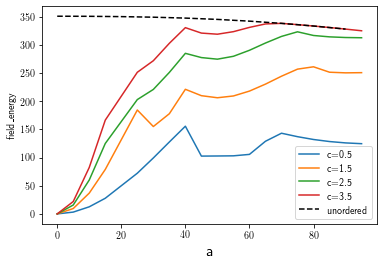

In [156]:
a_s = list(range(0,20,5))+list(range(25,100,5))
alpha_=-4
for alpha,c in [(alpha_,c) for c in cs]:
    plt.plot(a_s, [field_energies[a].loc[c,alpha] for a in a_s], label="c="+str(c))
a_s=range(0,100,10)
plt.plot(a_s, [.5*alpha**2*surfdatatens.loc[a/100, str(k)]*2*math.pi for a in a_s], label="unordered", 
         linestyle = '--',color='black')
plt.legend(fontsize=10)
plt.ylabel('field\_energy')
plt.xlabel("a", fontsize=16)

In [117]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=100
kappa=0
for alpha in alphas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for c in cs:
        energies = [(field_energies[a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/100,str(k)]+kappa*math.pi*curvdatatens.loc[a/100,str(k)]
                     ,a) for a in paths]
        energy, a = min(energies)
        minimum_as_row[c]= a
        minimum_Es_row[c] = energy
    minimum_as[alpha]=minimum_as_row
    minimum_Es[alpha] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as)

KeyError: '0.9'

In [ ]:
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(24,8))

alpha=-4
c=1.5

for ax, params in zip(axs.flat, [a for a in a_s]):
    a=params
    try:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        #print(filename)
        heatmap= complex_heatmap_2(filename)
        ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=math.sqrt(-alpha)))
        ax.set_title("a="+str(a))
    except FileNotFoundError:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        print(filename)
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#plt.savefig("rotational_series_k9_n6.png")

~/arc3-d/k9a00_finer/alpha_-4.0_C_1.5_snapshot.csv
~/arc3-d/k9a10_finer/alpha_-4.0_C_1.5_snapshot.csv


KeyError: 20

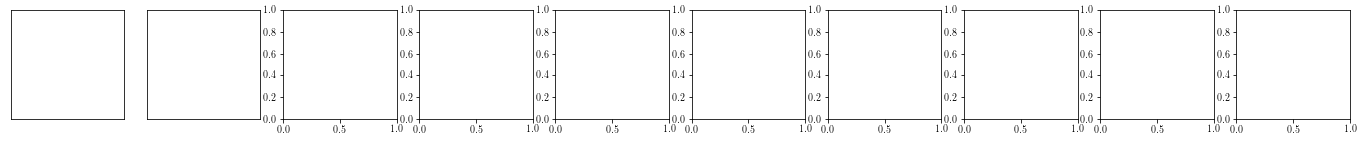

In [118]:
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(24,2))

alpha=-4
c=1.5

for ax, params in zip(axs.flat, [a for a in a_s]):
    a=params
    try:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_profile_abs.csv")
        profile= pd.read_csv(os.path.join(paths[a], filename), index_col=0)
        ax.set_ylim((0,math.sqrt(abs(alpha))))
        ax.axis('off')
        ax.axhline(y=0, color='black')
        ax.set_ylim((0,2.1))
        ax.plot(profile)
    except FileNotFoundError:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        print(filename)
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#plt.savefig("rotational_series_k9_n6_profiles.png")

NameError: name 'surfdatatens' is not defined

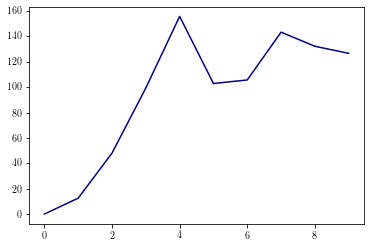

In [15]:
n=6
c_s=cs[:7]
cols=plt.cm.jet([i/len(cs) for i in range(len(cs))]) 
fine_as=np.arange(0,9.05,.1)
for i,(alpha,c) in enumerate([(alpha,c) for alpha in alphas[1:2] for c in c_s]):
    plt.plot(a_s, [field_energies[a].loc[c,alpha] for a in a_s], label="c = "+str(c), color=cols[i])
    area=surfdatatens.loc[a/10, str(k)]*2*math.pi
    if alpha<0:
        ordered_energy=abs(alpha)*c*n**2/2
    else: 
        ordered_energy=0
    plt.plot(fine_as, [ordered_energy*area*(a/10)**2 for a in fine_as], color=cols[i],linestyle=':')
plt.plot([0], [-1], label="ordered", 
         linestyle = ':',color='gray')
plt.plot(a_s, [.5*alpha**2*surfdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="unordered", 
         linestyle = '--',color='black')
plt.legend(fontsize=10)
plt.ylabel("field_energy", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.ylim((0,360))
#plt.xlim((0,4))
#plt.savefig("k9_n6_energy_landscapes.png")

In [16]:
straightfieldenergy=pd.read_csv("chapter2data/straightfieldenergy.csv", index_col=0)
straightfieldenergy

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.000031,0.000063,0.000094,0.000126,0.000157,0.000188,0.000220,0.000251,0.000283,0.000314,0.000346,0.000377,0.000408
0.02,0.000126,0.000251,0.000377,0.000503,0.000628,0.000754,0.000880,0.001005,0.001131,0.001256,0.001382,0.001508,0.001633
0.03,0.000283,0.000565,0.000848,0.001131,0.001414,0.001696,0.001979,0.002261,0.002544,0.002826,0.003109,0.003391,0.003674
0.04,0.000503,0.001005,0.001508,0.002010,0.002513,0.003015,0.003518,0.004020,0.004522,0.005024,0.005525,0.006027,0.006528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,0.358019,0.711969,1.058062,1.393025,1.714255,2.019874,2.308715,2.580239,2.834426,3.071650,3.292567,3.498020,3.688956
0.96,0.373581,0.742922,1.104079,1.453650,1.788932,2.107987,2.409615,2.693270,2.958942,3.207031,3.438227,3.653407,3.853555
0.97,0.391437,0.778455,1.156946,1.523370,1.874923,2.209597,2.526158,2.824051,3.103277,3.364259,3.607718,3.834568,4.045828
0.98,0.412890,0.821171,1.220562,1.607377,1.978702,2.332457,2.667368,2.982867,3.278963,3.556101,3.815033,4.056705,4.282175


(0.0, 360.0)

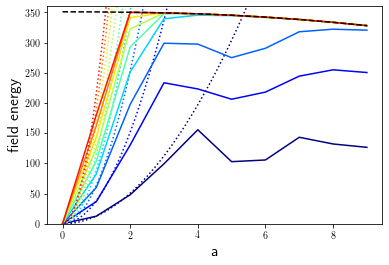

In [21]:
c_s=cs
cols=plt.cm.jet([i/len(cs) for i in range(len(c_s))]) 
fine_as=np.arange(0,9.05,.1)
for i,(alpha,c) in enumerate([(alpha,c) for alpha in alphas[1:2] for c in c_s]):
    plt.plot(a_s, [field_energies[a].loc[c,alpha] for a in a_s], label="c"+str(c), color=cols[i])
    plt.plot(fine_as, [n**2*c*abs(alpha)*straightfieldenergy.loc[round(a/10, 5), str(k)]*2*math.pi for a in fine_as], color=cols[i],linestyle=':')
plt.plot([0], [-1], label="ordered", 
         linestyle = ':',color='gray')
plt.plot(a_s, [.5*alpha**2*surfdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="unordered", 
         linestyle = '--',color='black')
#plt.legend(fontsize=10)
plt.ylabel("field energy", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.ylim((0,360))
#plt.xlim((0,5))
#plt.savefig("k9_n6_energy_landscapes.png")

(0.0, 360.0)

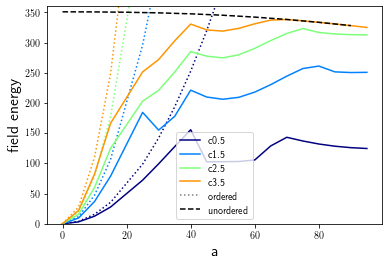

In [159]:
c_s=cs
cols=plt.cm.jet([i/len(cs) for i in range(len(c_s))]) 
a_s=list(range(0,20,5))+list(range(25,100,5))
n=6
alpha=-4
for i,(alpha,c) in enumerate([(alpha,c) for c in c_s]):
    plt.plot(a_s, [field_energies[a].loc[c,alpha] for a in a_s], label="c"+str(c), color=cols[i])
    plt.plot(fine_as, [(c*n**2*abs(alpha)/2)*2*math.pi*2*math.pi/.9*(a/100)**2 for a in fine_as], color=cols[i],linestyle=':')
plt.plot([0], [-1], label="ordered", 
         linestyle = ':',color='gray')
a_s = range(0,100,10)
plt.plot(a_s, [.5*alpha**2*surfdatatens.loc[a/100, str(k)]*2*math.pi for a in a_s], label="unordered", 
         linestyle = '--',color='black')
plt.legend(fontsize=10)
plt.ylabel("field energy", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.ylim((0,360))
#plt.xlim((0,5))
#plt.savefig("k9_n6_energy_landscapes.png")

Combine these 4 lines simulated in finer a intervals with (less interesting) higher c lines simulated earlier at a intervals of .1.

In [ ]:
#observables over time

In [53]:
time_series_files =dict([(a, os.path.join(paths[a], "alpha_-1.0_C_1.5.csv")) for a in paths])

In [54]:
time_df = dict([(a,pd.read_csv(time_series_files[a])) for a in paths])
time_df[.3]

,Unnamed: 0,abs_amplitude,amplitude_squared,surface_energy,field_energy,param_0,real_group_sampling_width
0,0,0.3,0.09,436.489011,(62.38048713322122+0j),0.3,0.005
1,1,0.3,0.09,436.489011,(51.229504202957315+0j),0.3,0.005
2,2,0.3,0.09,436.489011,(42.69338706107225+0j),0.3,0.005
3,3,0.3,0.09,436.489011,(36.255862632378744+0j),0.3,0.005
4,4,0.3,0.09,436.489011,(32.01349869360733+0j),0.3,0.005
...,...,...,...,...,...,...,...
49995,49995,0.3,0.09,436.489011,(21.455481875814232+0j),0.3,0.005
49996,49996,0.3,0.09,436.489011,(21.415910847088597+0j),0.3,0.005
49997,49997,0.3,0.09,436.489011,(21.421786761261274+0j),0.3,0.005
49998,49998,0.3,0.09,436.489011,(21.462260461291603+0j),0.3,0.005


(20.0, 23.0)

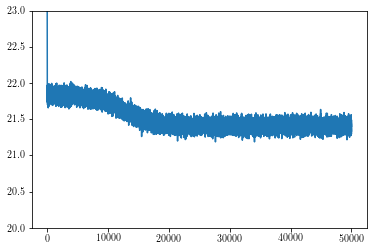

In [56]:
for a in paths:
    plt.plot([complex(x).real for x in time_df[a].loc[:,'field_energy']])
plt.ylim((20,23))

In [74]:
#cutoffs where found to be at:
cutoffs = dict([(a,sort_csv(os.path.join(paths[a], "global_cutoff.csv"), dtype=complex)) for a in paths])
cutoffs[0]

,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0
0.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
1.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
2.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
3.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
4.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
5.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
6.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
7.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0
8.5,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0,4995.0


In [16]:
#reanalyze a time series which should be equilibrated
timeseriesa0=[complex(x).real for x in time_df[1].loc[:,'field_energy']]


NameError: name 'time_df' is not defined

In [144]:
#used in metropolisengine:

from pymbar import timeseries

def get_equilibration_points(df, column_name = None):
    """
    directly uses pymbar's timeseries utility!
    source: https://github.com/choderalab/pymbar
    https://pymbar.readthedocs.io/en/master/timeseries.html 
    and references therein
    """
    equilibration_data=dict([])
    for name in 'field_energy':#df.columns.values:
        """
        t - t_0 starting point of equilibrated part of series
        g - the statistical innefficency = 2*correlationtime +1
        N_effmax - effective number of uncorrelated samples
        """
        if isinstance(df.loc[0, name] , complex):
            [t,g,Neff_max] = timeseries.detectEquilibration(np.array([x.real for x in df.loc[:,name]]))
            equilibration_data[name+"_real"] = [t,g,Neff_max]
            [t,g,Neff_max] = timeseries.detectEquilibration(np.array([x.imag for x in df.loc[:,name]]))
            equilibration_data[name+"_imag"] = [t,g,Neff_max]
        elif isinstance(df.loc[0, name] , str):
            [t,g,Neff_max] = timeseries.detectEquilibration(np.array([complex(x).real for x in df.loc[:,name]]))
            equilibration_data[name+"_real"] = [t,g,Neff_max]
            [t,g,Neff_max] = timeseries.detectEquilibration(np.array([complex(x).imag for x in df.loc[:,name]]))
            equilibration_data[name+"_imag"] = [t,g,Neff_max]
        else:
            [t, g, Neff_max] = timeseries.detectEquilibration(df.loc[:,name])
            equilibration_data[name] = [t,g,Neff_max]
    #print(equilibration_data)
    return equilibration_data


In [115]:
get_equilibration_points(time_df[1])

{'Unnamed: 0': [4996, 1.0, 5.0],
 'abs_amplitude': [4997, 2.3333333, 1.7142857],
 'amplitude_squared': [0, 1, 1],
 'surface_energy': [10, 4991.0, 1.0],
 'field_energy_real': [270, 5.4569364, 866.97],
 'field_energy_imag': [0, 1, 1],
 'param_0': [4997, 2.3333333, 1.7142857],
 'real_group_sampling_width': [0, 1, 1]}

{'Unnamed: 0': [4996, 1.0, 5.0], 'abs_amplitude': [4997, 2.3333333, 1.7142857], 'amplitude_squared': [0, 1, 1], 'surface_energy': [10, 4991.0, 1.0], 'field_energy_real': [270, 5.4569364, 866.97], 'field_energy_imag': [0, 1, 1], 'param_0': [4997, 2.3333333, 1.7142857], 'real_group_sampling_width': [0, 1, 1]}


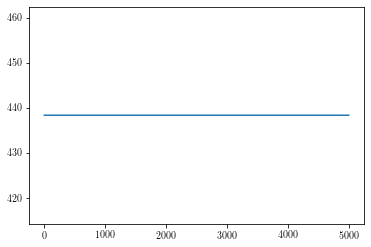

In [116]:
# the problem is apparently surface energy
print(get_equilibration_points(time_df[1]))
plt.plot(time_df[1].loc[:,'surface_energy'])

In [145]:
#metropolisengine corrected to
def get_equilibration_points(df, column_name = None):
    """
    directly uses pymbar's timeseries utility!
    source: https://github.com/choderalab/pymbar
    https://pymbar.readthedocs.io/en/master/timeseries.html 
    and references therein
    """
    equilibration_data=dict([])
    for name in df.columns.values:
        if df.loc[:,name].nunique()>1: #ignore const series
            """
            t - t_0 starting point of equilibrated part of series
            g - the statistical innefficency = 2*correlationtime +1
            N_effmax - effective number of uncorrelated samples
            """
            if isinstance(df.loc[0, name] , complex):
                [t,g,Neff_max] = timeseries.detectEquilibration(np.array([x.real for x in df.loc[:,name]]))
                equilibration_data[name+"_real"] = [t,g,Neff_max]
                [t,g,Neff_max] = timeseries.detectEquilibration(np.array([x.imag for x in df.loc[:,name]]))
                equilibration_data[name+"_imag"] = [t,g,Neff_max]
            elif isinstance(df.loc[0, name] , str):
                [t,g,Neff_max] = timeseries.detectEquilibration(np.array([complex(x).real for x in df.loc[:,name]]))
                equilibration_data[name+"_real"] = [t,g,Neff_max]
                [t,g,Neff_max] = timeseries.detectEquilibration(np.array([complex(x).imag for x in df.loc[:,name]]))
                equilibration_data[name+"_imag"] = [t,g,Neff_max]
            else:
                [t, g, Neff_max] = timeseries.detectEquilibration(df.loc[:,name])
                equilibration_data[name] = [t,g,Neff_max]
    #print(equilibration_data)
    return equilibration_data


In [149]:
#get improved global cutoffs (from field_energy_real only)
#new_global_cutoffs = {}
for a in range(10):
    accutoffs={}
    for alpha in np.arange(-4.0, 2, 1):
        accutoffs[alpha]={}
        for c in np.arange(0.5, 9, 1):
            file = os.path.join(paths[a], "alpha_"+str(alpha)+"_C_"+str(c)+".csv")
            time_df=pd.read_csv(file)
            cutoff= get_equilibration_points(time_df)['field_energy_real']
            accutoffs[alpha][c]=cutoff[0]
            print(a,alpha,c, cutoff)
    new_global_cutoffs[a]=pd.DataFrame(accutoffs)

0 -4.0 0.5 [54, 5.59733, 883.8142]
0 -4.0 1.5 [170, 5.6692233, 852.14496]
0 -4.0 2.5 [395, 4.7583303, 967.9866]
0 -4.0 3.5 [192, 5.1800942, 928.3615]
0 -4.0 4.5 [228, 5.572385, 856.5453]
0 -4.0 5.5 [263, 4.5565877, 1039.8132]
0 -4.0 6.5 [292, 7.167275, 657.014]
0 -4.0 7.5 [320, 4.672619, 1001.79364]
0 -4.0 8.5 [376, 4.802126, 963.1151]
0 -3.0 0.5 [60, 5.48681, 900.5232]
0 -3.0 1.5 [126, 5.03809, 967.62854]
0 -3.0 2.5 [157, 4.49514, 1077.6083]
0 -3.0 3.5 [166, 4.9924555, 968.4613]
0 -3.0 4.5 [187, 6.819252, 705.9425]
0 -3.0 5.5 [231, 5.038321, 946.74396]
0 -3.0 6.5 [234, 6.3469696, 751.0671]
0 -3.0 7.5 [452, 4.777578, 952.1561]
0 -3.0 8.5 [290, 4.8963437, 962.1465]
0 -2.0 0.5 [66, 4.969595, 993.0387]
0 -2.0 1.5 [88, 4.7570667, 1032.7793]
0 -2.0 2.5 [166, 7.2329264, 668.47076]
0 -2.0 3.5 [231, 4.683805, 1018.4028]
0 -2.0 4.5 [184, 5.15303, 934.78986]
0 -2.0 5.5 [174, 5.9629064, 809.5046]
0 -2.0 6.5 [213, 6.2510786, 765.9478]
0 -2.0 7.5 [249, 6.722604, 706.86896]
0 -2.0 8.5 [258, 5.404124

In [155]:
new_global_cutoffs[8]

,-4.0,-3.0,-2.0,-1.0,0.0,1.0
0.5,3649,4807,4014,2718,32,374
1.5,4961,4973,0,75,116,127
2.5,4965,136,98,226,150,129
3.5,154,240,332,213,119,173
4.5,206,164,162,905,175,227
5.5,629,256,802,169,319,242
6.5,231,589,1454,279,323,302
7.5,325,1458,321,288,296,471
8.5,514,316,286,446,333,354
